In [3]:
#import spikeinterface modules
import spikeinterface as si
import spikeinterface.extractors as se
import spikeinterface.toolkit as st
import spikeinterface.sorters as ss
import spikeinterface.comparison as sc
import spikeinterface.widgets as sw
import numpy as np
import glob

#import everything else
import os
import sys
import numpy as np
import neo
import pandas as pd
import h5py
import McsPy
import sys, importlib, os
import McsPy.McsData
import McsPy.McsCMOS
from McsPy import ureg, Q_
import matplotlib.pyplot as plt
%matplotlib notebook

In [4]:
filedirec = r"D:\Files_Reutlingen_Jenny\191021_extra"
os.chdir(filedirec)

In [5]:
filelist = glob.glob('*.h5')
filelist

['aCSF_adult_15min_spont.h5',
 'hCSF_adult_20min_spont0002.h5',
 'hCSF_child_20min_spont.h5']

In [6]:
probe_file="C:/Users/User/Documents/JO/gitkraken/MEA_analysis/Spikesorting/MCS_MEA_256_100µM_spacing.prb"
outputdirectory_SC='D:/Files_Reutlingen_Jenny/191021_extra_Spikesorting/output_Spykingcirucs'

In [7]:
# make one file the relevant filename for this sortingtrial
filename = filelist[0]

In [28]:
# create an outputpath for this analysis

outpath=outputdirectory_SC+'__'+filename.split('.')[0]+'_spikesorting'
try:
    os.mkdir(outpath)
except OSError:
    print ("Creation of the directory %s failed" % outpath)
else:
    print ("Successfully created the directory %s " % outpath)
    
outpath_SC=outpath+'_SC'
try:
    os.mkdir(outpath_SC)
except OSError:
    print ("Creation of the directory %s failed" % outpath_SC)
else:
    print ("Successfully created the directory %s " % outpath_SC)

Creation of the directory D:/Files_Reutlingen_Jenny/191021_extra_Spikesorting/output_Spykingcirucs__aCSF_adult_15min_spont_spikesorting failed
Successfully created the directory D:/Files_Reutlingen_Jenny/191021_extra_Spikesorting/output_Spykingcirucs__aCSF_adult_15min_spont_spikesorting_SC 


In [9]:
# load the recording with the spikeinterface tools, filter it and cmr
recording_MEA=se.MCSH5RecordingExtractor(os.path.join(filedirec, filename))
recording_f = st.preprocessing.bandpass_filter(recording_MEA, freq_min=150, freq_max=5000, filter_type='butter', order=2)
recording_cmr = st.preprocessing.common_reference(recording_f, reference='median')

In [11]:
# add the probe file
recording_cmrprobe=recording_MEA.load_probe_file(probe_file)

In [15]:
# the recording can be subdivided 
fs = round(recording_cmrprobe.get_sampling_frequency())
#recording_sub = se.SubRecordingExtractor(recording_cmrprobe, start_frame=200*fs, end_frame=320*fs)
print(fs)

25000.0


In [17]:
os.chdir(outpath)

In [18]:
recording_cache = se.CacheRecordingExtractor(recording_cmrprobe)

<IPython.core.display.Javascript object>


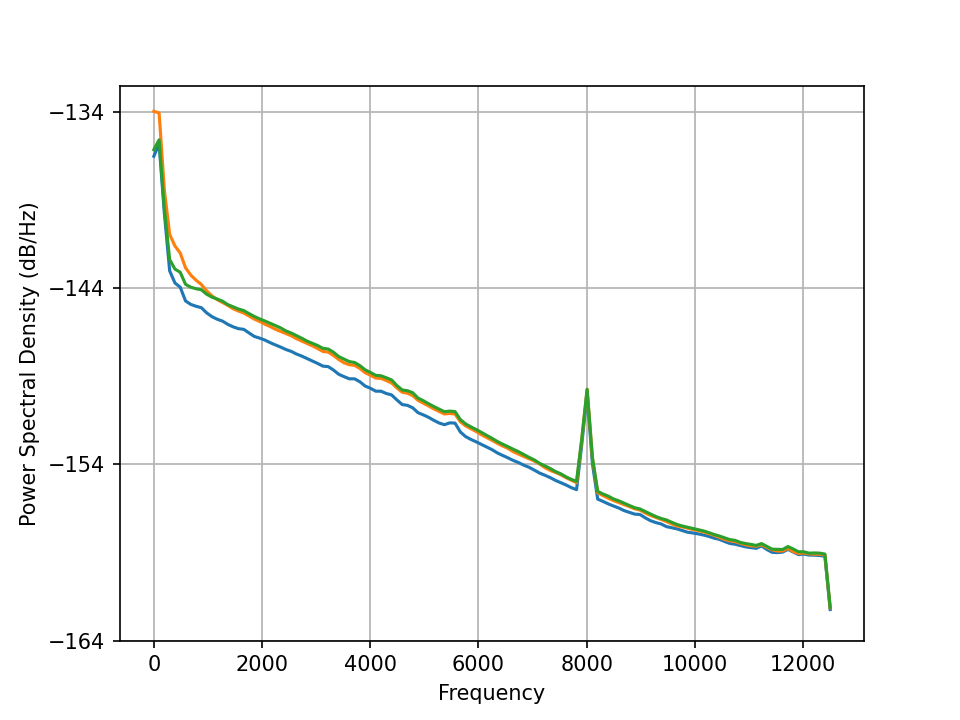

In [20]:
w_sp = sw.plot_spectrum(recording_cmrprobe, channels=[0, 1, 2])


In [22]:
# find the cache in the system and move it to a folder where you can load it again later
recording_cache.filename
recording_cache.get_tmp_folder()
recording_cache.move_to('filtered_data.dat') 
print(recording_cache.filename)


filtered_data.dat


In [23]:
recording_cache.dump_to_pickle('recording.pkl')

In [38]:
# to load the cache
recording_loaded = se.load_extractor_from_pickle('recording.pkl')
recording_cache=recording_loaded

In [30]:
ss.get_sorter_description('spykingcircus')

'Spyking Circus uses a smart clustering and a greedy template matching approach for \n    spike sorting. For more information see https://doi.org/10.7554/eLife.34518'

In [32]:
ss.get_default_params('spykingcircus')

{'detect_sign': -1,
 'adjacency_radius': 100,
 'detect_threshold': 6,
 'template_width_ms': 3,
 'filter': True,
 'merge_spikes': True,
 'auto_merge': 0.75,
 'num_workers': None,
 'whitening_max_elts': 1000,
 'clustering_max_elts': 10000}

In [33]:
ss.get_params_description('spykingcircus')

{'detect_sign': 'Use -1 (negative), 1 (positive) or 0 (both) depending on the sign of the spikes in the recording',
 'adjacency_radius': 'Radius in um to build channel neighborhood',
 'detect_threshold': 'Threshold for spike detection',
 'template_width_ms': 'Template width in ms. Recommended values: 3 for in vivo - 5 for in vitro',
 'filter': 'Enable or disable filter',
 'merge_spikes': 'Enable or disable automatic mergind',
 'auto_merge': 'Automatic merging threshold',
 'num_workers': 'Number of workers (if None, half of the cpu number is used)',
 'whitening_max_elts': 'Max number of events per electrode for whitening',
 'clustering_max_elts': 'Max number of events per electrode for clustering'}

In [35]:
# perform the spikesorting 
sorting_SC = ss.run_spykingcircus(recording_cmrprobe, output_folder=outpath_SC, template_width_ms=5)

RUNNING SHELL SCRIPT: D:\Files_Reutlingen_Jenny\191021_extra_Spikesorting\output_Spykingcirucs__aCSF_adult_15min_spont_spikesorting_SC\run_spykingcircus.bat


In [41]:
# loading
sorting_SC = se.SpykingCircusSortingExtractor(outpath_SC)


In [36]:
sorting_SC


<IPython.core.display.Javascript object>


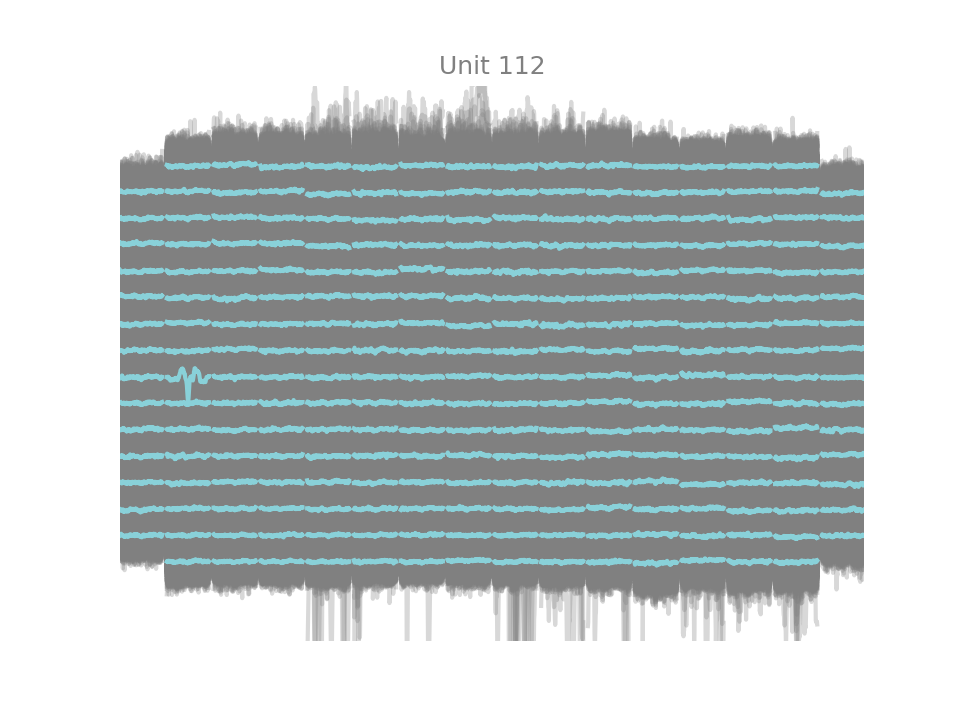

{}


In [40]:
w_wf = sw.plot_unit_waveforms(recording_cache, sorting_SC, unit_ids=[112], color='#89D1D9')


<IPython.core.display.Javascript object>


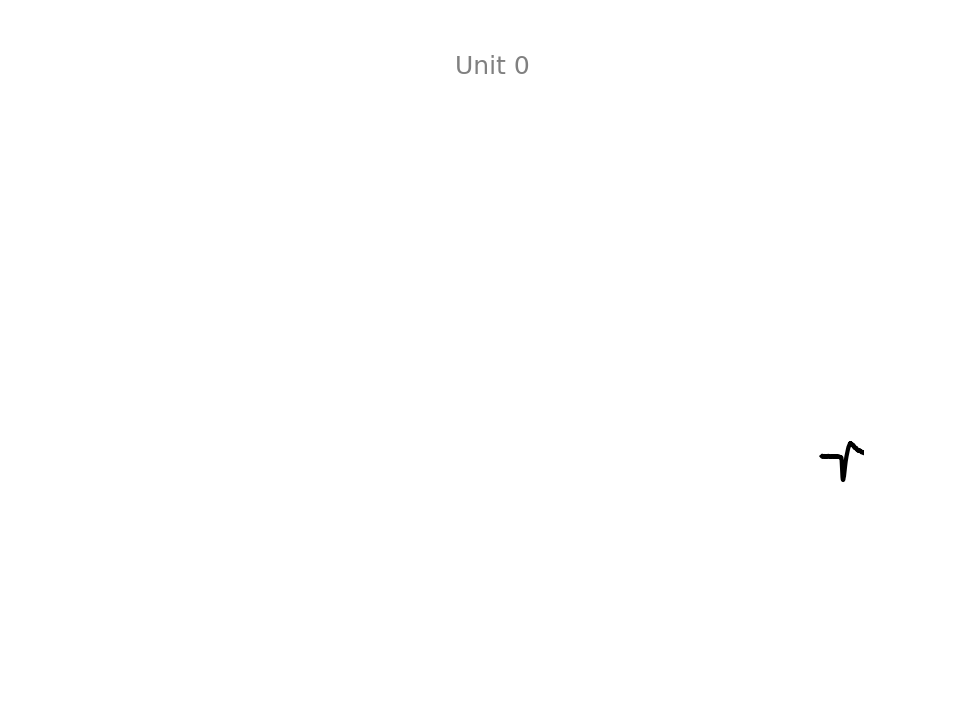

{}


In [42]:
sw.plot_unit_templates(recording_cache, sorting_SC, unit_ids=[0], max_channels=1)

In [43]:
ppd= {0: [15, 11],
         1: [10, 9],
         2: [13, 9],
         3: [14, 10],
         4: [10, 8],
         5: [12, 8],
         6: [11, 7],
         7: [15, 7],
         8: [13, 5],
         9: [12, 6],
         10: [15, 3],
         11: [14, 4],
         12: [15, 1],
         13: [11, 4],
         14: [9, 5],
         15: [8, 7],
         16: [10, 1],
         17: [11, 0],
         18: [8, 3],
         19: [9, 2],
         20: [7, 0],
         21: [8, 5],
         22: [6, 3],
         23: [7, 4],
         24: [4, 1],
         25: [5, 2],
         26: [12, 12],
         27: [13, 13],
         28: [15, 12],
         29: [10, 10],
         30: [13, 10],
         31: [14, 11],
         32: [11, 8],
         33: [12, 9],
         34: [10, 7],
         35: [15, 8],
         36: [13, 6],
         37: [12, 7],
         38: [15, 4],
         39: [14, 5],
         40: [9, 6],
         41: [10, 6],
         42: [12, 3],
         43: [13, 2],
         44: [12, 0],
         45: [10, 5],
         46: [10, 2],
         47: [11, 1],
         48: [8, 4],
         49: [9, 3],
         50: [7, 5],
         51: [8, 0],
         52: [6, 2],
         53: [7, 3],
         54: [4, 0],
         55: [5, 1],
         56: [9, 12],
         57: [10, 15],
         58: [8, 11],
         59: [9, 14],
         60: [8, 15],
         61: [8, 13],
         62: [9, 9],
         63: [13, 15],
         64: [15, 13],
         65: [15, 14],
         66: [13, 11],
         67: [14, 12],
         68: [11, 9],
         69: [12, 10],
         70: [14, 8],
         71: [15, 9],
         72: [13, 7],
         73: [9, 7],
         74: [15, 5],
         75: [14, 6],
         76: [12, 4],
         77: [11, 5],
         78: [14, 2],
         79: [13, 3],
         80: [13, 0],
         81: [14, 0],
         82: [11, 2],
         83: [12, 1],
         84: [9, 4],
         85: [10, 3],
         86: [8, 1],
         87: [9, 0],
         88: [7, 2],
         89: [7, 6],
         90: [5, 0],
         91: [6, 1],
         92: [4, 3],
         93: [5, 4],
         94: [14, 13],
         95: [14, 14],
         96: [12, 11],
         97: [13, 12],
         98: [15, 10],
         99: [11, 10],
         100: [13, 8],
         101: [14, 9],
         102: [14, 7],
         103: [9, 8],
         104: [11, 6],
         105: [15, 6],
         106: [13, 4],
         107: [12, 5],
         108: [15, 2],
         109: [14, 3],
         110: [13, 1],
         111: [14, 1],
         112: [11, 3],
         113: [12, 2],
         114: [10, 0],
         115: [10, 4],
         116: [8, 2],
         117: [9, 1],
         118: [7, 1],
         119: [8, 6],
         120: [6, 4],
         121: [6, 0],
         122: [4, 2],
         123: [5, 3],
         124: [8, 8],
         125: [14, 15],
         126: [7, 7],
         127: [1, 0],
         128: [0, 4],
         129: [5, 6],
         130: [2, 6],
         131: [1, 5],
         132: [5, 7],
         133: [3, 7],
         134: [4, 8],
         135: [0, 8],
         136: [2, 10],
         137: [3, 9],
         138: [0, 14],
         139: [4, 11],
         140: [0, 12],
         141: [1, 11],
         142: [5, 12],
         143: [9, 15],
         144: [4, 15],
         145: [8, 14],
         146: [8, 12],
         147: [7, 9],
         148: [8, 10],
         149: [7, 13],
         150: [7, 11],
         151: [7, 15],
         152: [6, 6],
         153: [6, 5],
         154: [3, 3],
         155: [2, 2],
         156: [0, 3],
         157: [5, 5],
         158: [2, 5],
         159: [1, 4],
         160: [4, 7],
         161: [3, 6],
         162: [5, 8],
         163: [0, 7],
         164: [2, 9],
         165: [3, 8],
         166: [0, 11],
         167: [1, 10],
         168: [3, 12],
         169: [2, 13],
         170: [6, 9],
         171: [5, 9],
         172: [6, 12],
         173: [6, 14],
         174: [5, 13],
         175: [5, 15],
         176: [4, 14],
         177: [5, 11],
         178: [3, 15],
         179: [4, 12],
         180: [5, 10],
         181: [3, 13],
         182: [7, 10],
         183: [8, 9],
         184: [7, 12],
         185: [7, 14],
         186: [6, 13],
         187: [6, 15],
         188: [5, 14],
         189: [6, 11],
         190: [2, 1],
         191: [3, 2],
         192: [0, 2],
         193: [0, 1],
         194: [2, 4],
         195: [1, 3],
         196: [4, 6],
         197: [3, 5],
         198: [1, 7],
         199: [0, 6],
         200: [2, 8],
         201: [6, 8],
         202: [0, 10],
         203: [1, 9],
         204: [3, 11],
         205: [4, 10],
         206: [2, 15],
         207: [1, 15],
         208: [1, 13],
         209: [2, 12],
         210: [3, 14],
         211: [13, 14],
         212: [7, 8],
         213: [12, 13],
         214: [11, 11],
         215: [11, 12],
         216: [12, 15],
         217: [10, 11],
         218: [10, 13],
         219: [11, 14],
         220: [2, 0],
         221: [3, 1],
         222: [1, 2],
         223: [1, 1],
         224: [3, 4],
         225: [2, 3],
         226: [0, 5],
         227: [4, 5],
         228: [2, 7],
         229: [1, 6],
         230: [1, 8],
         231: [6, 7],
         232: [4, 9],
         233: [0, 9],
         234: [2, 11],
         235: [3, 10],
         236: [2, 14],
         237: [1, 14],
         238: [0, 13],
         239: [1, 12],
         240: [4, 13],
         241: [12, 14],
         242: [6, 10],
         243: [11, 13],
         244: [9, 10],
         245: [10, 12],
         246: [11, 15],
         247: [9, 11],
         248: [9, 13],
         249: [10, 14],
         250: [4, 4],
         251: [3, 0]}

<IPython.core.display.Javascript object>


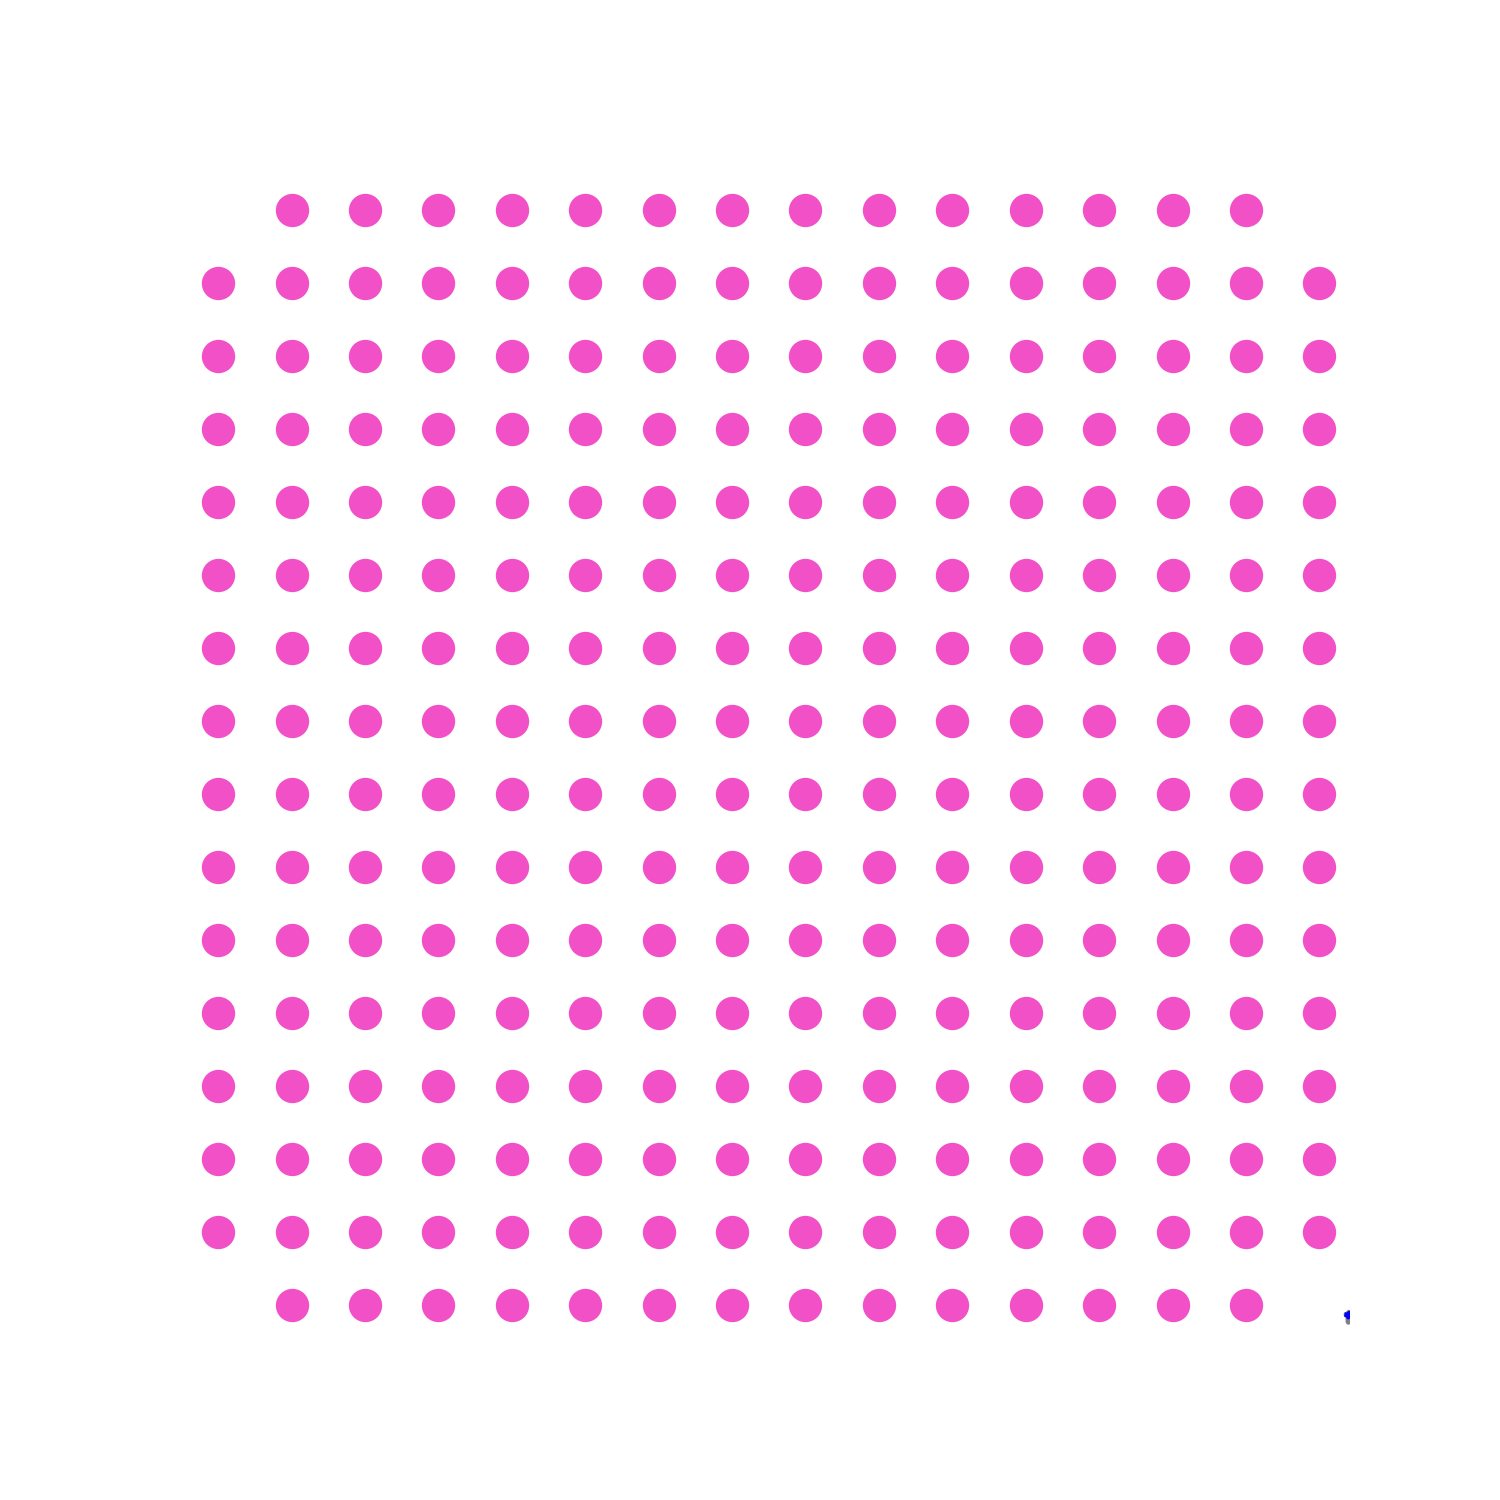

{}


In [76]:
fig, ax = plt.subplots(nrows=16, ncols=16, sharex=True, 
                       sharey=True,figsize=(10, 10))
for key in ppd:
    i = ppd[key][0]
    j = ppd[key][1]
    ax[i,j].plot(0.5, 0.5,'o', markersize=15, color='#F250C7')
    ax[i,j].axis('off')
    
ax[0,0].axis('off')
ax[0,15].axis('off')
ax[15,0].axis('off')
ax[15,15].axis('off')


sw.plot_unit_waveforms(recording=recording_cache, sorting=sorting_SC, unit_ids=[0], color='b', max_channels=1,
                       set_title=None, axis_equal=True, figure=fig, ax=ax[15,15])
    
fig.show()

<IPython.core.display.Javascript object>


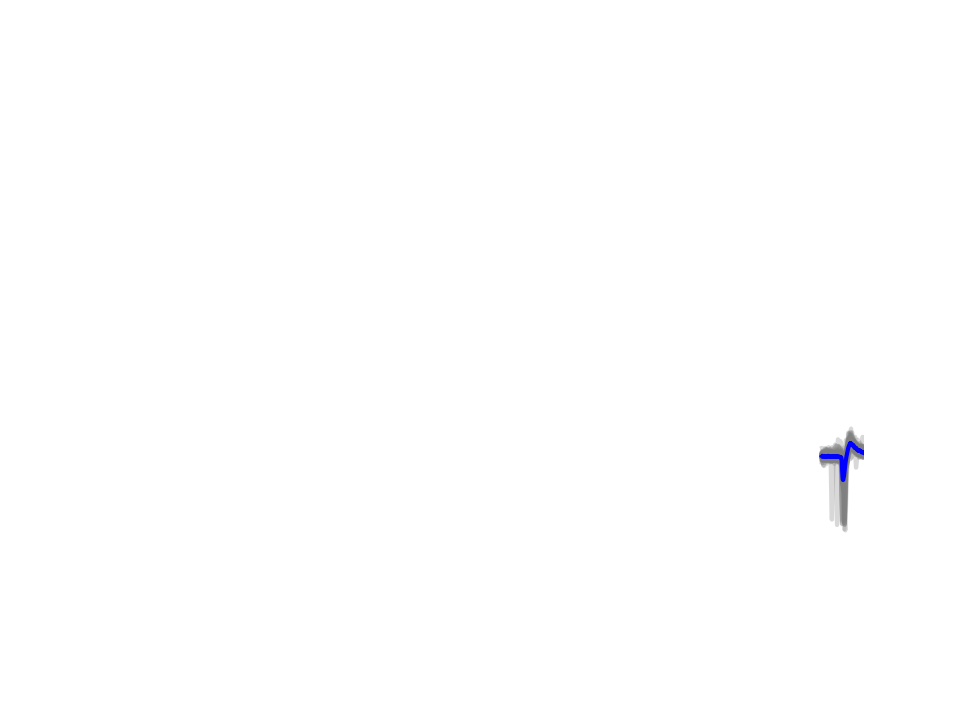

{}


In [74]:
sw.plot_unit_waveforms(recording=recording_cache, sorting=sorting_SC, unit_ids=[0], color='b', max_channels=1,
                       set_title=None, axis_equal=True)

<IPython.core.display.Javascript object>


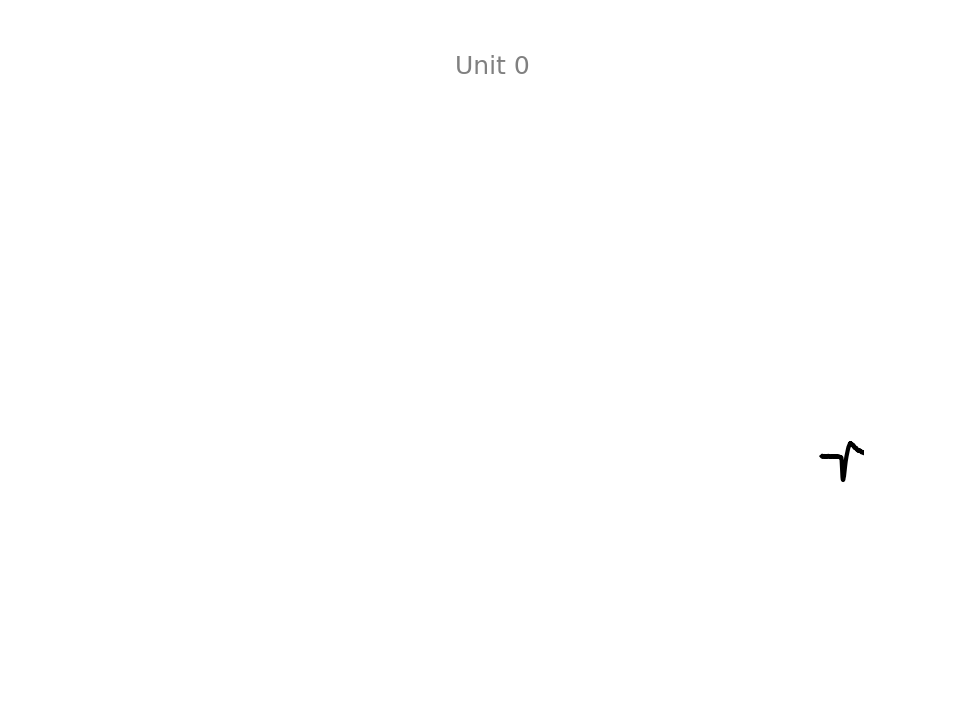

{}


In [65]:
sw.plot_unit_templates(recording_cache, sorting_SC, unit_ids=[0], max_channels=10, radius=5)

In [77]:
waveforms = st.postprocessing.get_unit_waveforms(recording_cache, sorting_SC, verbose=True)

Number of chunks: 91 - Number of jobs: 1


ValueError: cannot mmap an empty file